# [[데이콘] 소비자 데이터 기반 소비 예측 경진대회](https://dacon.io/competitions/official/235893/overview/description)
- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/소비 예측 경진대회/train.csv')
test = pd.read_csv('data/소비 예측 경진대회/test.csv')

In [3]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [5]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [6]:
train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'target']].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,617.121841
std,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,603.587972
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,70.750000
50%,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,412.000000
75%,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,1068.750000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,2525.000000


In [7]:
train[['Education']].value_counts(), train[['Education']].value_counts(normalize=True)

(Education 
 Graduation    570
 PhD           254
 Master        173
 2n Cycle       89
 Basic          22
 dtype: int64,
 Education 
 Graduation    0.514440
 PhD           0.229242
 Master        0.156137
 2n Cycle      0.080325
 Basic         0.019856
 dtype: float64)

In [8]:
train[['Marital_Status']].value_counts(), train[['Marital_Status']].value_counts(normalize=True)

(Marital_Status
 Married           415
 Together          296
 Single            234
 Divorced          120
 Widow              39
 Alone               2
 Absurd              1
 YOLO                1
 dtype: int64,
 Marital_Status
 Married           0.374549
 Together          0.267148
 Single            0.211191
 Divorced          0.108303
 Widow             0.035199
 Alone             0.001805
 Absurd            0.000903
 YOLO              0.000903
 dtype: float64)

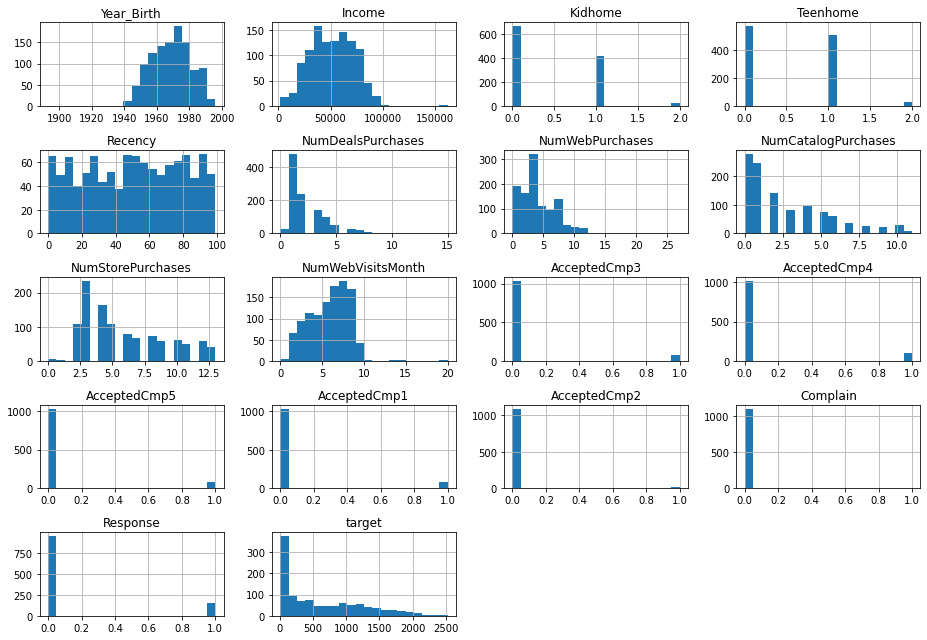

In [9]:
train.iloc[:, 1:].hist(bins = 20, figsize = (13, 9))
plt.tight_layout()
plt.show()

<Figure size 1152x1368 with 0 Axes>

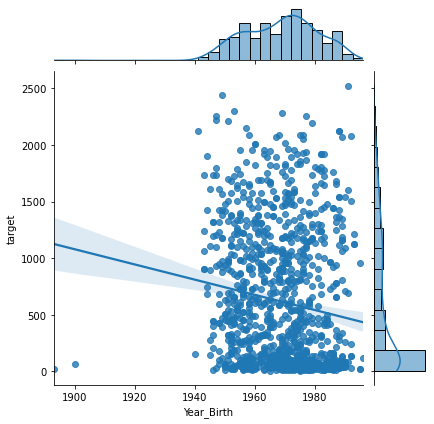

In [10]:
plt.figure(figsize = (16, 19))
sns.jointplot(x = train['Year_Birth'], y = train['target'], kind='reg')
plt.show()

가장 최근에 태어난 사람일 수록 제품 총 소비량이 작다.

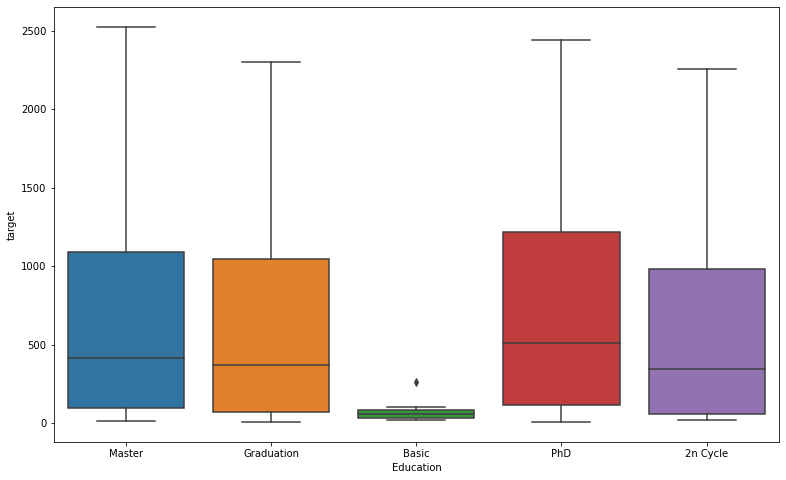

In [15]:
plt.figure(figsize = (13, 8))
sns.boxplot(data = train, x = 'Education', y='target');

AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0  
Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  

In [16]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [31]:
print(pd.pivot_table(train, index = 'AcceptedCmp1', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp2', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp3', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp4', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp5', values='target', aggfunc=['mean', 'sum']))

                     mean     sum
                   target  target
AcceptedCmp1                     
0              558.000969  575857
1             1419.921053  107914


                     mean     sum
                   target  target
AcceptedCmp2                     
0              607.331806  662599
1             1245.411765   21172


                    mean     sum
                  target  target
AcceptedCmp3                    
0             610.405432  629328
1             707.051948   54443


                     mean     sum
                   target  target
AcceptedCmp4                     
0              569.679171  577085
1             1123.010526  106686


                     mean     sum
                   target  target
AcceptedCmp5                     
0              540.003891  555124
1             1608.087500  128647


캠페인 횟수와 제안 수락 여부에 따른 제품 총 소비량의 평균과 합을 보면 제안을 수락하지 않았을 때 소비량이 더 많았다.

In [32]:
print(pd.pivot_table(train, index = 'Complain', values='target', aggfunc=['mean', 'sum']))

                mean     sum
              target  target
Complain                    
0         620.501821  681311
1         246.000000    2460


고객이 지난 2년 동안 불만을 제기한 경험이 있으면 제품 총 소비량이 현저히 줄어든다.

In [33]:
print(pd.pivot_table(train, index = 'Response', values='target', aggfunc=['mean', 'sum']))

                mean     sum
              target  target
Response                    
0         557.613039  530290
1         977.585987  153481
